<h1> Office Hours Discussion Notebook </h3>
<h4> By: Eric Penner </h4>

<h2> 1 Summary </h2>

The basic idea of our office hour discussion was the following. A student had devised a methodology to perform a technique commonly called (in the stats/ML literature) subset selection, and we were discussing why or why not this method was viable in the context of Lab 3. Subset selection techniques are designed to find the “most relevant” regressors in a large collection of regressors to a particular outcome, in the case of Lab 3 it would be crime rate (crmrte). This is done in a primarily numerical/automated way. I will attempt to describe the technique proposed and then I will summarize my comments on this methodology thereafter. I invite the student  who proposed this method to  provide any corrections they deem necessary if they feel I have misrepresented their methodology in any way.

Please take the time to read the last two sections as they lay out my thoughts on this methodology from a more macro view.

<h2> 2 Methodology </h2>

<h3> 2.1 Step One </h3>

The student proposes to normalize each regressor by subtracting the minimum of the sample from each sample value and then divide by the inter-sample range. i.e.  for each regressor $X_{ji}$ where $j\in \{1,2,3,...,p\}$ he proposes to create a new transformed value $\tilde{X}_{ji}$ as follows. 

\begin{align*} 
\tilde{X}_{ji} = \frac{ X_{ji} - \min(\{X_{ji}\}_{i=1}^n) }{\max(\{X_{ji}\}_{i=1}^n) -\min(\{X_{ji}\}_{i=1}^n) }  \;\;\; \text{ so that } \;\;\; 0\leq \tilde{X}_{ji} \leq 1
\end{align*}

This normalization is performed in hopes that when the following regression is conducted the magnitude of the estimated coefficients are comparable in the sense that those which are further away from zero are more important to, more relevant to, or have the largest effect on the outcome variable than those which are closer to zero. 


<h3> 2.2 Step Two </h3>

The student proposes to regress the outcome/dependent variable $Y_i$ on the transformed set of variables as follows. 

\begin{align*}
Y_i = \beta_0 + \beta_1\tilde{X}_{1i} + \beta_2\tilde{X}_{2i} + \cdots +\beta_p\tilde{X}_{pi} + u_i  
\end{align*} 

which will generate a set of estimated coefficients $\{\hat{\beta}^{(1)}_j \}_{j=1}^p$. Note, the reason for the superscript (1) will be made clear in the following.

<h3> 2.3 Step Three </h3>

The student proposed to take the estimated coefficients  and develop some criteria (we didn't go into detail what this might be) for selecting the $k_1 < p$ most relevant regressors to $Y_i$. Since we didn't 
discuss this in any detail, for the sake of this discussion, I will take the liberty of providing a very simple criteria as follows. Let $a_1$ be some fixed positive number. 

$$ \text{ if } |\hat{\beta}^{(1)}_{j}| > a_1 \text{ then regressor $X_j$ is retained for further analysis otherwise it is discarded} $$

<h3> 2.4 Step Four </h3>

The student proposes to repeat steps two and three one or more times only using the regressor that are retained in the previous repetition i.e. in the first repetition. The following regression is conducted, (get ready for some dense math notation, which I promise I will explain). 

\begin{align*}
Y_i = \beta_0 + \beta_1\tilde{X}_{1i}1\{|\hat{\beta}^{(1)}_{1}| > a_1\} + \beta_2\tilde{X}_{2i}1\{|\hat{\beta}^{(1)}_{2}| > a_1\}  + \cdots +\beta_p\tilde{X}_{pi}1\{|\hat{\beta}^{(1)}_{p}| > a_1\}  + u_i  
\end{align*}

where

\begin{align*}
1\{|\hat{\beta}^{(1)}_{j}| > a_1\} = 
\begin{cases} 
1 &\text{if } |\hat{\beta}^{(1)}_{j}| > a_1 \\ 
0 & \text{if }|\hat{\beta}^{(1)}_{j}| \leq a_1 
\end{cases}
\end{align*}

which translates to 

\begin{align*}
\beta_j \tilde{X}_{ji}1\{|\hat{\beta}^{(1)}_{j}| > a_1\} = 
\begin{cases} 
\beta_j \tilde{X}_{ji}&\text{if } |\hat{\beta}^{(1)}_{j}| > a_1 \\ 
0 & \text{if }|\hat{\beta}^{(1)}_{j}| \leq a_1 
\end{cases}
\end{align*}

which is just a mathematical way of saying that the regressor $\tilde{X}_{j}$ will be included in the second regression if satisfies the criteria $|\hat{\beta}^{(1)}_{j}| > a_1$. This regression will then generate a second set (hence the reason for the superscript) of estimated coefficients, $\{\hat{\beta}^{(2)}_{j}\}_{j=1}^p$ where for notational simplicity we set $\hat{\beta}^{(2)}_{j} = 0$ if $|\hat{\beta}^{(1)}_{j}| < a_1$ i.e. the estimated coefficient is set to zero if its corresponding regressor wasn't included in the second regression.

** Note:** The criteria function $1\{|\hat{\beta}^{(1)}_{1}| > a_1\}$ could be replaced with any other reasonable criteria function which maps the values of the estimated coefficients $\{ \hat{\beta}^{(1)}_{j} \}_{j = 1}^p$ to $\{0,1\}$  and the notation above, as well as my analysis of it below will still be valid.

After the second set of estimated coefficients is generated the student will apply the same or slightly different criteria function in order to select an even smaller set $k_2 < k_1 <p$ of regressors to included in a subsequent regression. For simplicity suppose the student selects another positive number $a_2$ and applies the following, 

$$ \text{ if } |\hat{\beta}^{(2)}_{j}| > a_2 \text{ then regressor $X_j$ is retained for further analysis otherwise it is discarded} $$

Note that if $|\hat{\beta}^{(1)}_{j}| < a_1$ then $\hat{\beta}^{(2)}_{j} = 0$ and since $a_2$ is strictly positive $1\{|\hat{\beta}^{(2)}_{j}| > a_2\} = 0$ meaning that any regressor discarded in a previous step will stay discarded. This cycle of estimation and discarding of regressors will presumably continue  for some finite number $n_s$ of steps until the final transformed regression, 

\begin{align*}
Y_i = \beta_0 + \beta_1\tilde{X}_{1i}1\{|\hat{\beta}^{(n_s-1)}_{1}| > a_{n_s-1}\} + \cdots +\beta_p\tilde{X}_{pi}1\{|\hat{\beta}^{(n_s-1)}_{p}| > a_{n_s-1}\}  + u_i  
\end{align*}

produces a final set of transformed regression coefficients $\{ \hat{\beta}^{(n_s)}_j \}_{j=1}^p$.

<h3> 2.5 Step Five</h3>

Next the student proposes to run the following regression on the untransformed regressors $\{X_{j}\}_{j=1}^p$ with the last criteria value $a_{n_s}$ (a positive number) i.e.

\begin{align*}
Y_i = \beta_0 + \beta_1 X_{1i}1\{|\hat{\beta}^{(n_s)}_{1}| > a_{n_s}\} + \cdots +\beta_p X_{pi}1\{|\hat{\beta}^{(n_s)}_{p}| > a_{n_s}\}  + u_i  
\end{align*}

which generates final coefficient estimates $\{\hat{\beta}^{*}_j \}_{j=1}^p$ 


<h3> 2.6 Step Six </h3> 

The student proposes to interpret and perform inference on the coefficients $\{\hat{\beta}^{*}_j \}_{j=1}^p$, using the following test statistic and approximate sampling distribution. 

\begin{align*}
\frac{\hat{\beta}^*_j }{\sqrt{ \frac{(n-1)^{-1} \sum_{i=1}^n\hat{u}^2}{\sum_{i=1}^n X_j^2}}} \sim t_{(n-1)}
\end{align*}

under the null hypothesis $H_o: \beta_j = 0$. 

In [2]:
library(repr)

<h2> 3 Analysis </h2> 

<h3> 3.1 Steps One and Two </h3> 

The purpose of steps one and two are to determine which regressors $\{X_j\}_{j=1}^p$ are "most important" or "more relevant" to the outcome $Y$. Now since implicitly we are interested in which of the regressors are the most important in the *population* joint distribution of all regressors, we must be able to justify generalizing the results of the regression within our sample to this larger population. If we can't justify this generalization step our results are only valid within the sample and do not credibly apply the greater population.  

In this class we have relied on two mechanisms to justify a generalization step; the Law of Large Numbers, and the Central Limit Theorem, where both of the versions of these mechanisms that we have encountered in this class rely on a very important feature of the sampling distribution, namely that observations must be independent and identically distributed (i.i.d).

It is clear that the even if observations $\{X_{ji}\}_{i=1}^n$ are i.i.d, the sequence of values $\{\tilde{X}_{ji} \}_{i=1}^n$ are **not** i.i.d.

** 3.1.1 Logical Argument **

Independent observations means that the value of one observation cannot depend in any way on the values of any other observation but since $\tilde{X}_{ji}$ explicitly depends on two other observations; $\min(\{\tilde{X}_{ji} \}_{i=1}^n)$ and $\max(\{\tilde{X}_{ji} \}_{i=1}^n)$, then $\{\tilde{X}_{ji}\}_{i=1}^n$ is not i.i.d.

** 3.1.2 Mathematical Argument **

If any two observations $X_{ji}$ and $X_{ji'}$ are independent then (provided $P(X_{ji'}=1) \neq 0$) by definition 

$$ P(X_{ji} < 1 | X_{ji'} = 1) = \frac{P(X_{ji} < 1 | X_{ji'} = 1)}{P(X_{ji'}=1)} \stackrel{indep}{=}\frac{P(X_{ji}<1)P(X_{ji'}=1)}{P(X_{ji'}=1)} = P(X_{ji}<1)$$

Here, this is not the case. First note that there is always a $1$ and a $0$ in $\{\tilde{X}_{ji} \}_{i=1}^n$ and since each observation $X_{ji}$ is i.i.d each observation has an equal chance of being transformed into $0$ or $1$ as a result 

$$P(X_{ji} = 0) = P(X_{ji} = 1) = 1/n \;\;\; \text{ which implies that } \;\;\;  P(X_{ji} <1) = \frac{n-1}{n}$$ 

However, from our understanding of continuously distributed random variables $P(X_{ji} = X_{ji'})=0$ thus 1 will only (a.e.) appear once in  $\{\tilde{X}_{ji} \}_{i=1}^n$ this means that. 

$$ P(X_{ji} < 1 | X_{ji'} = 1) = 1 $$

As a result 

$$ P(X_{ji} < 1 | X_{ji'} = 1) \neq P(X_{ji}<1) $$ 

Thus $X_{ji}$ and $X_{ji'}$ are not independent. 

** 3.1.3 Independence Simulation ** 

If you are not convinced, you can see this numerically.  First some function definitions,

In [3]:
# Plotting options
options(repr.plot.width=10, repr.plot.height=5)

# Data presets 
n <- 10
mu <- c(10)
var <- c(4)
name <-'x_1'

# DGP function
data <- function(n,mu,var,name){
    for (i in 1:length(mu)){
        # Data generation
        x1 <- rnorm(n,mu[i],var[i])
        if (i==1) {
            # Data Conversion
            x <- as.data.frame(x1)
        }
        else {
        x <- cbind(x,as.data.frame(x1))
        }   
    }
    names(x) <- name
    return(x)
}

#Transformation function
trs <- function(x,y){
   xt <- (x-min(y))/(max(y) - min(y))
   return(xt)
}


First we generate a sample from $N(\mu,\sigma^2)$, transform it into $\{\tilde{X}_{i}\}_{i=1}^{10} $ then show the histogram. 

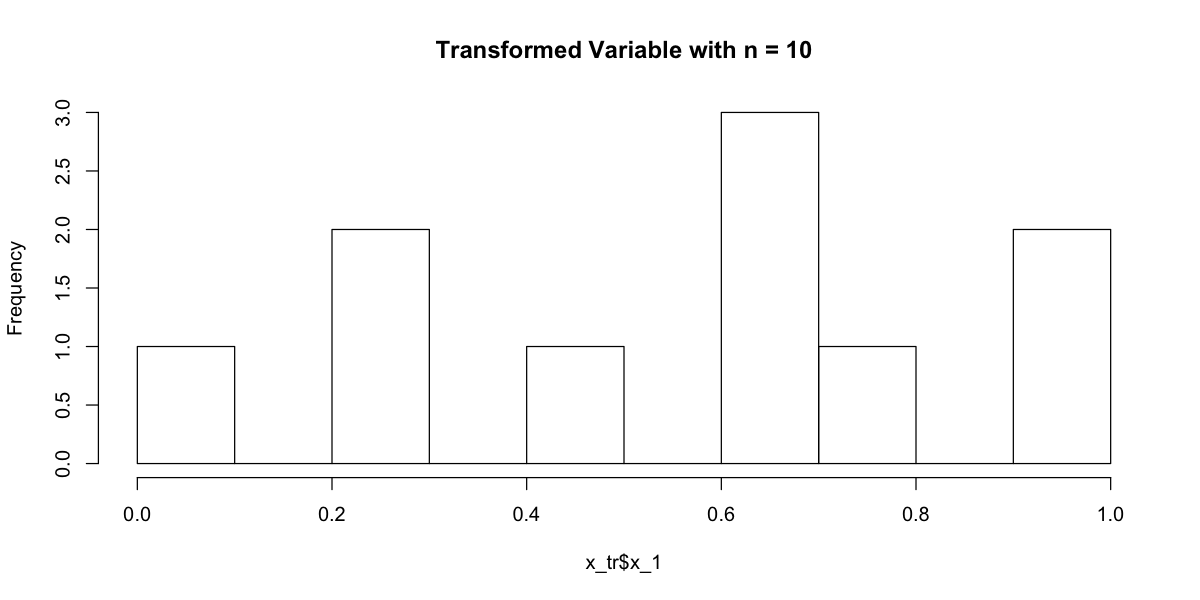

In [4]:
# Data
x <- data(n,mu,var,name)
# First transformed data set
x_tr <-lapply(x[1],trs,y=x[1])
# Histogram of first transformed data set
hist(x_tr$x_1,breaks= 10,main ="Transformed Variable with n = 10")

Next, I will add an observation to the sample which is 3 units higher than the previous max, and since $X_i$ is normally distributed this will happen with positive probability. 

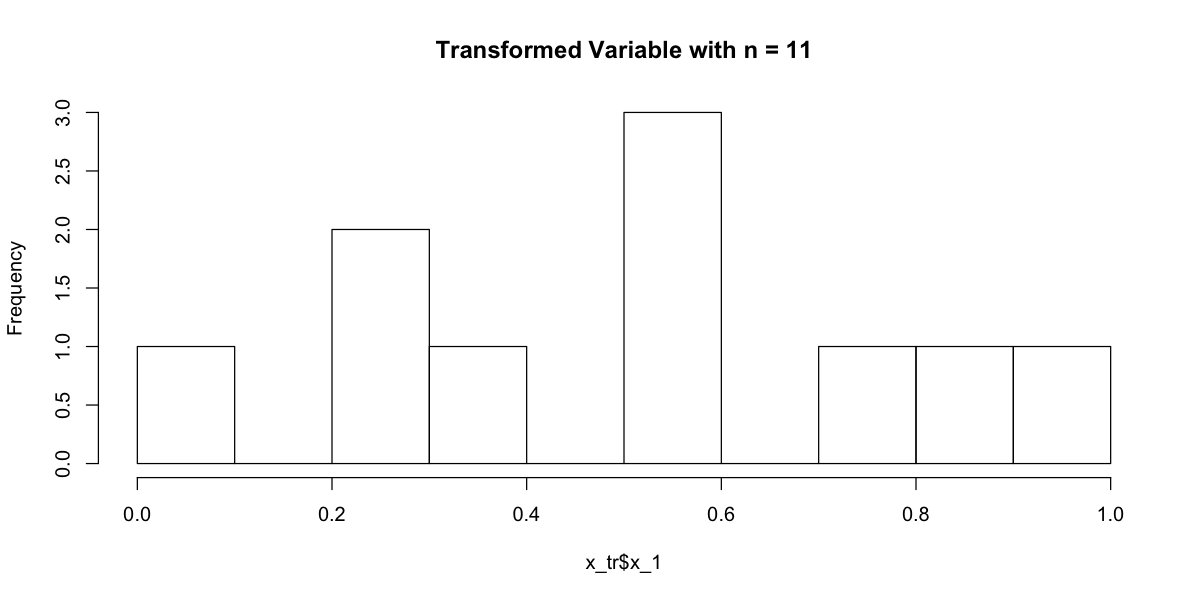

In [5]:
# Adding a data point 3 units higher than the existing max
x[length(x[1])+1,1] = max(x[,1]+3)
# Second transformed data set
x_tr <-lapply(x[1],trs,y=x[1])
# Histogram of second transformed data set
hist(x_tr$x_1,breaks= 10,main ="Transformed Variable with n = 11")

We can see that the inclusion of one additional observations changes the value of all but one observation. 

** 3.1.4 Relationships ** 

Although not part of my original comments about transformation $\tilde{X}_{ji}$ implicit in the undertaking of the transformation is the assumption that the marginal relationship between $\tilde{Y}_{i}$ and $\tilde{X}_{ji}$ produces the same ordering of coefficient values as the relationship between $Y_{i}$ and $X_{ji}$ i.e. 

$$ \frac{\partial \tilde{Y}}{\partial \tilde{X}_j} < \frac{\partial \tilde{Y}}{\partial \tilde{X}_{j'}} \;\; \text{ whenever } \;\; \frac{\partial Y}{\partial X_j} < \frac{\partial Y}{\partial X_{j'}} $$

In order to justify this, one would have to show algebraically that this is the case. Unfortunately, even if we dispense with the denominator term of the transformation, it is not. This is because even with only two regressors,

$$ \min(\{Y_i\}_{i=1}^n) \neq \beta_0 + \beta_1 \min(\{X_{1i}\}_{i=1}^n) + \beta_2 \min(\{X_{2i}\}_{i=1}^n) $$

Can you spot why? As result we have 

$$ Y_i - \min(\{Y_i\}_{i=1}^n) \neq \beta_0 + \beta_1( X_{1i} - \min(\{X_{1i}\}_{i=1}^n)) + \beta_2 (X_{2i} - \min(\{X_{2i}\}_{i=1}^n)) + u_i $$

Consequently it is unclear what relationship exists between $\tilde{Y}_i$ and regressors $\{\tilde{X}_{ji}\}_{j=1}^2$. 

** 3.1.5 Relationships Simulation **

Again don't take my word for it lets simulate it and see what happens.

In [6]:
# Number of observations per regression
n <- 100
# Means of regressors X_1 and X_2 respectively
x_mu <- c(-5,10)
# Variances of regressors X_1 and X_2 respectively
x_var <- c(3,7)
# Variance of the error term
e_var <- 4
# True coefficients
beta <- c(1,5,3)
# Names of regressors
names <- c('x_1','x_2')
# Number of different coefficient estimates generated
nreps <- 1000
# Initializing 
cmp = c()
z_1 = c()
z_2 = c()

# Simulation loop
for (j in 1:nreps) {
    # Regressor Generation
    X <- data(n,x_mu,x_var,names)
    # Error term generation
    e <- data(n,0,e_var,'err')
    # Output generation
    Y <- rep(c(1),10)* beta[1] + as.matrix(X)%*%beta[-1] + as.matrix(e)
    # Output data conversion and naming
    Y <- as.data.frame(Y)
    names(Y) <- "Y"
    # Collecting dependent and independent variables
    X <-cbind(X,Y)
    # Applying the transformation to all variables in X
    for (i in 1:length(beta)){
        a1 <- lapply(X[i],trs,y=X[i])
        if (i==1){
            reg_data <- as.data.frame(a1)
        }
        else{
            reg_data <- cbind(reg_data,as.data.frame(a1))
        }
    }
    # Running the transformed regression
    model <- lm(Y ~ x_1 + x_2, data  = reg_data)
    # Estimated beta_1
    z_1[j] <- model$coeff[2]
    # Estimated beta_2
    z_2[j] <- model$coeff[3]
    # Indicator for whether \hat{\beta}_1 < \hat{\beta}_2
    cmp[j] <- as.integer(z_1[j]<z_2[j])
}

Now lets plot the distribution of the estimated coefficient and see if anything pops out

[1] "Mean Estimate beta_1:  0.583693138874794"

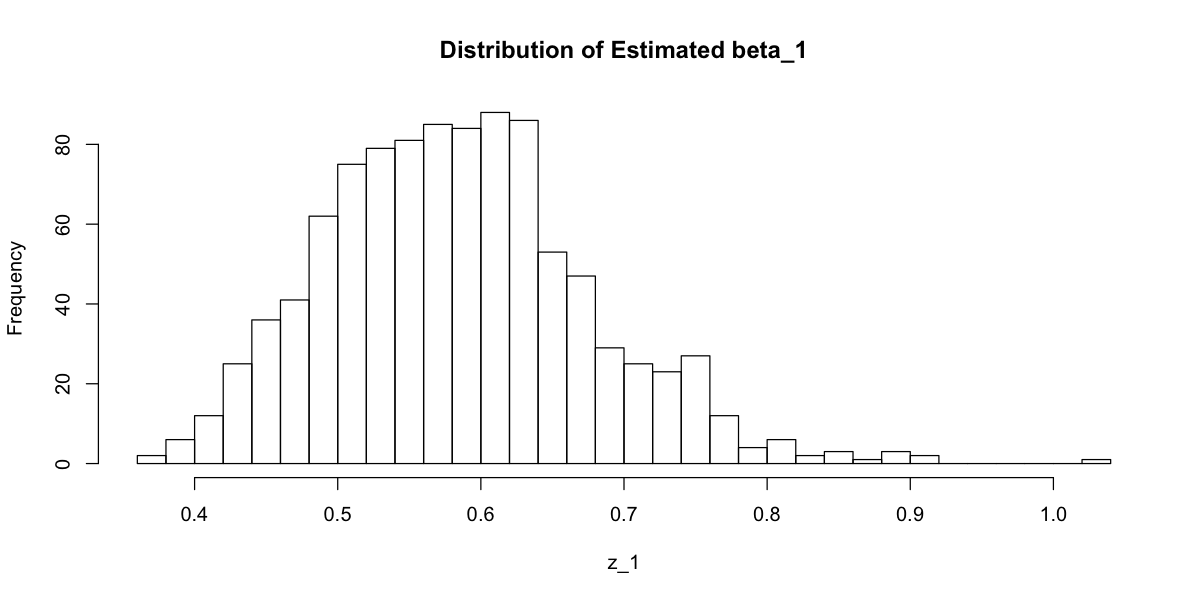

[1] "Mean Estimate beta_2:  0.811363028873689"

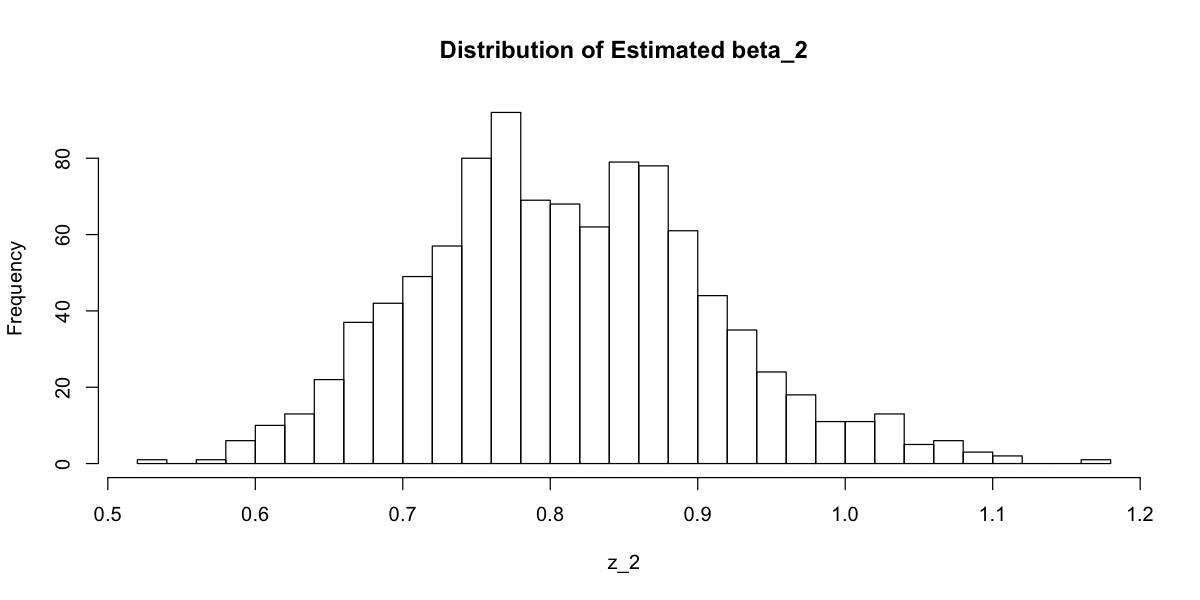

In [11]:
hist(z_1, breaks = 40, main = "Distribution of Estimated beta_1")
paste("Mean Estimate beta_1: ",mean(z_1))
hist(z_2,  breaks = 40,main = "Distribution of Estimated beta_2")
paste("Mean Estimate beta_2: ",mean(z_2)) 

First thing that should pop out is that the mean of the estimated beta_1 (the larger coefficient in the true regression) is smaller that the mean of the estimated beta_2 (the smaller coefficient in the true regression).

Secondly lets calculate the proportion of the regressions where the estimated beta_1 is larger than the estimated beta_2 i.e. what percent of the time regression gave us the correct ordering of coefficients meaning it would have led to the correct conclusion that $X_1$ is more important / more relevant than $X_2$.  

In [12]:
paste("Correct Orderings: " , (nreps - sum(cmp))/nreps*100, " % of all trails" )

[1] "Correct Orderings:  100  % of all trails"

As a result the combination of a non i.i.d sample $\{\tilde{X}_{i}\}_{i=1}^n$ and the lack of a connection between the marginal effects of the original model and the transformed model, one cannot generalize the results of the transformed regression to the joint population distribution of $Y$ and $X$. 

**Note:** No doubt there is a number of cases of different data generating processes where the correct ordering is given most of the time, but since as I have shown here that even in the very favorable situation that all random variables are normal one cannot generalize the results of the transformed regression to the original regression. 

<h3> 3.2  Steps Three through Six </h3>

In the future I will flesh this out a bit more but the idea is, even if we could generalize from the transformed regression to the original regression, steps three through six describe a process of taking a function of the estimate $\hat{\beta}^{(1)}_{j}$ and then using it to generate another estimate, $\hat{\beta}^{(2)}_{j}$ which depends on $\hat{\beta}^{(1)}_{j}$, and then using that estimate to generate another estimate $\hat{\beta}^{(3)}_{j}$ and so on ...

The problem is that to perform inference on any estimate which is a function of a previous estimate we have to account for this additional variability when either calculating or approximating its sampling distribution so that we can calculate good confidence intervals or perform hypothesis with an accurate type 1 error rate . 

Recall this is what William Gosset was doing when he developed the student t distribution, he had to account for the additional variability in the Z score function when replacing $\sigma^2$ with $s^2 = \hat{\sigma}^2$ (see question 3.6 of Unit 8 Live Session for the practical consequences of using a poor approximation to a sampling distribution).

If we don't account for this additional variability we will (in truth) not be able to generalize our results from the sample to the population thus defeating the whole purpose of the method described above. 

Note that R will not do this for you, you have to tell R what sampling distribution to use, otherwise it will naively use the $t$ distribution as if no previous estimates where use to generate the current one. 


As always don't take my word for it, lets simulate a very simple two step estimator where all regressors have the same variance $V(X_1) = V(X_2) = V(X_3)$ so that we can dispense with the problems caused by the propopsed transformation in step one. Here we will run a regression on 3 variables and in each repitition I will drop the regressor with the lowest estimated coefficient, and run the regression again.

I simulate the regressors as being independent of one another, would it be a problem if the weren't independent?


[1] "Mean Estimate beta_1:  0.419092936030693"

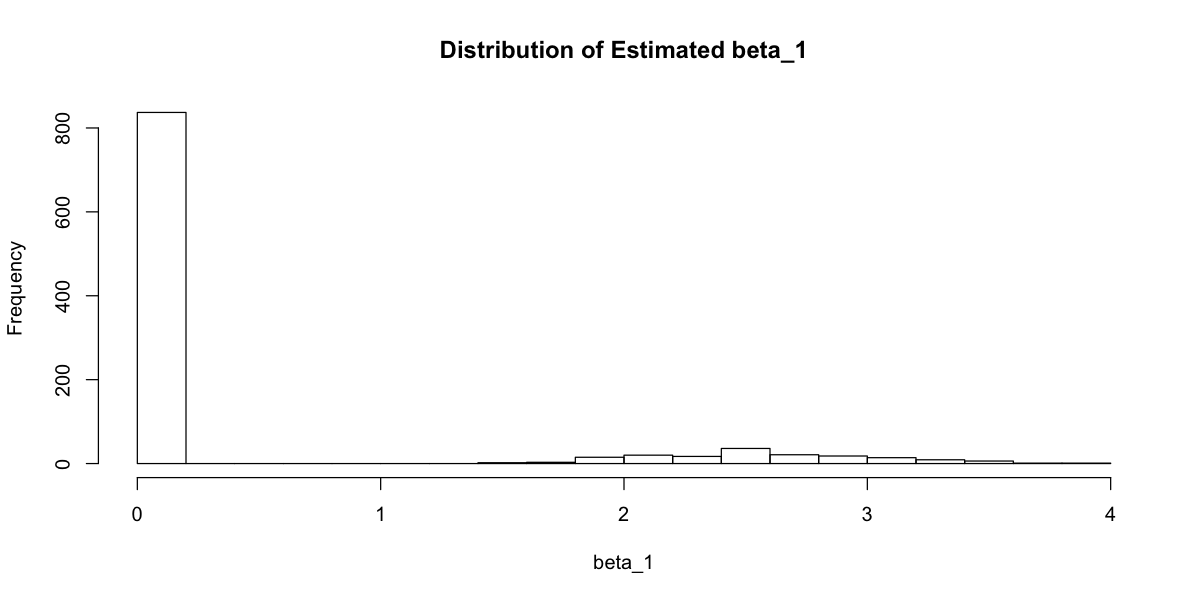

[1] "Mean Estimate beta_2:  2.4459382291765"

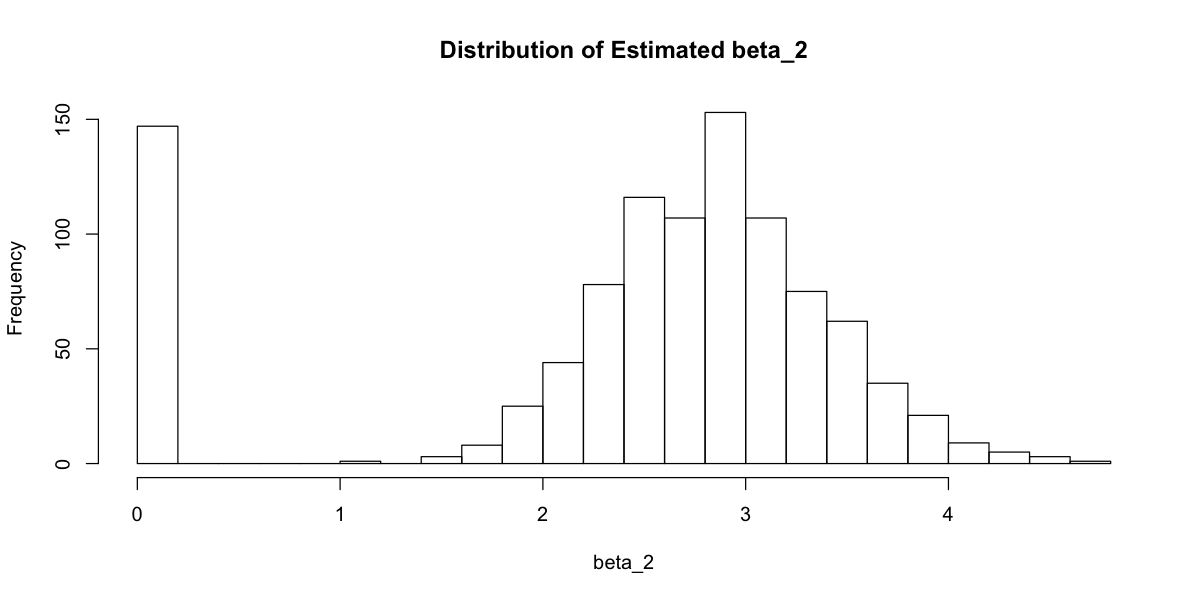

[1] "Mean Estimate beta_3:  3.43140341499286"

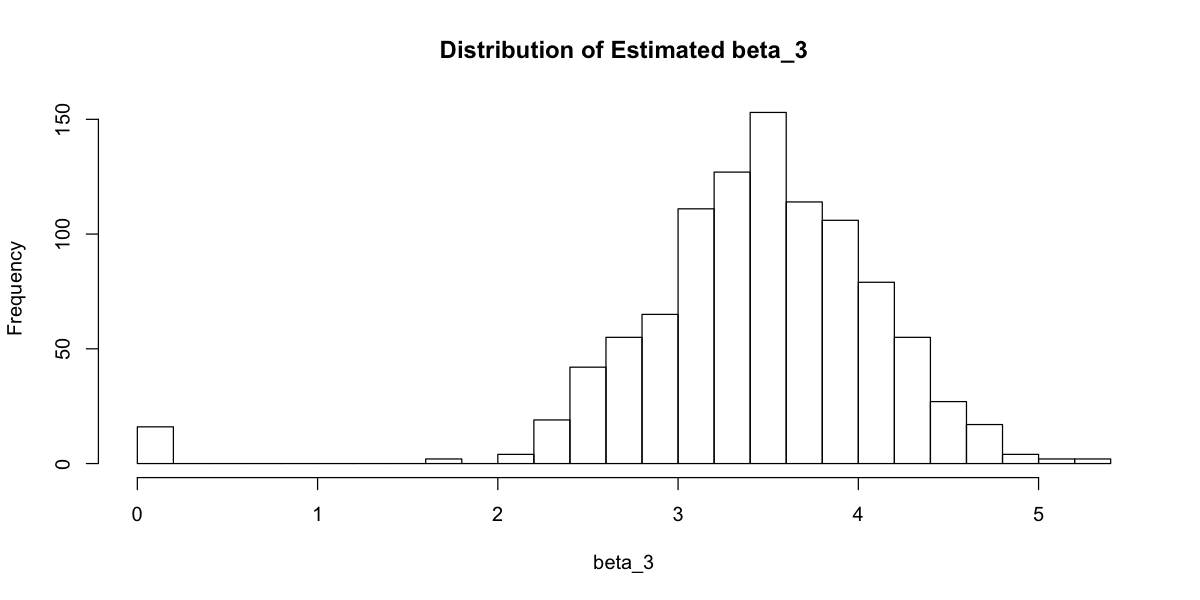

In [9]:
set.seed(123)
# Number of observations per regression
n <- 100
# Means of regressors X_1 and X_2 respectively
x_mu <- c(-1,1,2)
# Variances of regressors X_1 and X_2 respectively
x_var <- c(1,1,1)
# Variance of the error term
e_var <- 5
# True coefficients
beta <- c(1,2,2.75,3.5)
# Names of regressors
names <- c('x_1','x_2','x_3')
# Number of different coefficient estimates generated
nreps <- 1000
# Initializing 
cmp = c()
beta_1 = c()
beta_2 = c()
beta_3 = c()

# Simulation loop
for (j in 1:nreps) {
    # Regressor Generation
    X <- data(n,x_mu,x_var,names)
    # Error term generation
    e <- data(n,0,e_var,'err')
    # Output generation
    Y <- rep(c(1),10)* beta[1] + as.matrix(X)%*%beta[-1] + as.matrix(e)
    # Output data conversion and naming
    Y <- as.data.frame(Y)
    names(Y) <- "Y"
    # Collecting dependent and independent variables
    reg_data <-cbind(X,Y)
    # First Model
    model1 = lm(Y ~ x_1 + x_2 + x_3, data = reg_data)
    # Second model
    if (model1$coeff[2] == min(model1$coeff[-1])){
        model2 = lm(Y ~ x_2 + x_3, data = reg_data)
        beta_1[j] = 0
        beta_2[j] = model2$coeff[2]
        beta_3[j] = model2$coeff[3]
    }

    if (model1$coeff[3] == min(model1$coeff[-1])){
        model2 = lm(Y ~ x_1 + x_3, data = reg_data)
        beta_1[j] = model2$coeff[2]
        beta_2[j] = 0
        beta_3[j] = model2$coeff[3]
    }

    if (model1$coeff[4] == min(model1$coeff[-1])){
        model2 = lm(Y ~ x_1 + x_2, data = reg_data)
        beta_1[j] = model2$coeff[2]
        beta_2[j] = model2$coeff[3]
        beta_3[j] = 0
    }
}

hist(beta_1, breaks = 20, main = "Distribution of Estimated beta_1")
paste("Mean Estimate beta_1: ",mean(beta_1,na.rm=TRUE))
hist(beta_2, breaks = 20, main = "Distribution of Estimated beta_2")
paste("Mean Estimate beta_2: ",mean(beta_2,na.rm=TRUE))
hist(beta_3, breaks = 20, main = "Distribution of Estimated beta_3")
paste("Mean Estimate beta_3: ",mean(beta_3,na.rm=TRUE))



As a result of our very simple two step estimation procedure we can see that **none** of the sampling distributions above have an approximately normal distribution. Thus attempting to approximate these distributions with the t distribution (as R will naively do) is completely inappropriate in the sense that one cannot justify a generalization step. 

There are a number of other details that bear mentioning but that will have to wait since I feel as though I am about to jump the shark.

<h2> 4 Comments on Search for and Construction of Convenient Statistical Tools</h2> 

Although I have shown here that the proposed methodology is not valid in that one cannot justify generalizing from sample to population using this methodology. I fully support the spirit in which it was developed. This student wanted to analyze the Lab 3 crime data in a way not presented in this class and they put a great deal of thought into constructing a estimation procedure which seemed as though it could accomplished it. 

In your careers as data scientists you will likely be presented with a number of problems for which there is no "out of the box" solution available. When you encounter problems like this I encourage you to do as this student has done, dream up a way to do it that seems feasible, and then maybe ask an experienced econometrician/statistician what they think and/or dig into your devore/wooldrige text book and see if you can determine if all the conditions necessary for generalizing from sample to population are justified.

This is essentially what econometricians/statisticians do all day, we discover a problem that doesn't have a solution, dream up an estimator to solve it, and then spend a shit load of time trying to figure out the conditions under which you can justify a generalization step, and hope like hell that it is not impossible (let alone feasible) to satisfy them all at the same time. 


<h2> 5 Thanks </h2>

I want to thank the student for bringing this methodology to my attention, it gave me an excellent opportunity to make a larger point about generalization. I hope that in the future all of you develop the skills in order to construct valid estimators of your own, and I encourage you to take every opportunity to do so. 